In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [75]:
d=pd.read_csv("Ecommerce.csv")
d

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


### Get rid of non-numerical columns of the dataset

In [76]:
list1=d.columns
for i in range(len(list1)):
    if type(d[list1[i]][0])==str:
        d=d.drop(list1[i],axis=1)
        
d

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

Text(18.125, 0.5, 'Yearly Amount Spent')

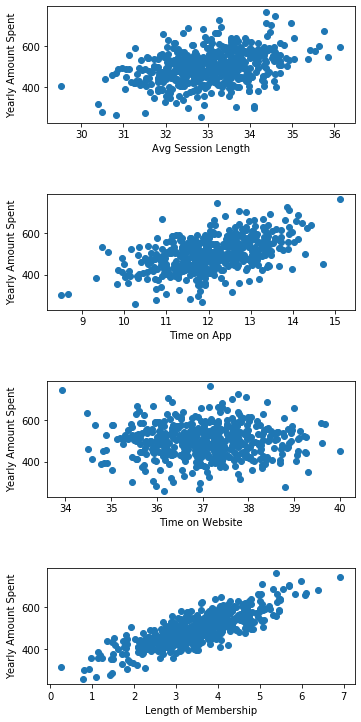

In [77]:
list_c=d.columns

fig, axs = plt.subplots(4, 1)
fig.set_figwidth(5)
fig.set_figheight(10)
fig.tight_layout(h_pad = 5)

axs[0].scatter(d[list_c[0]],d[list_c[4]])
axs[0].set_xlabel(list_c[0])
axs[0].set_ylabel(list_c[4])

axs[1].scatter(d[list_c[1]],d[list_c[4]])
axs[1].set_xlabel(list_c[1])
axs[1].set_ylabel(list_c[4])

axs[2].scatter(d[list_c[2]],d[list_c[4]])
axs[2].set_xlabel(list_c[2])
axs[2].set_ylabel(list_c[4])

axs[3].scatter(d[list_c[3]],d[list_c[4]])
axs[3].set_xlabel(list_c[3])
axs[3].set_ylabel(list_c[4])



### Leave only one feature that has a linear relationship with the target variable.

In [78]:
d=d[[list_c[3],list_c[4]]]
d.head
d[d.columns.difference([list_c[4]])]

,Length of Membership
0,4.082621
1,2.664034
2,4.104543
3,3.120179
4,4.446308
...,...
495,3.746573
496,3.576526
497,4.958264
498,2.336485


### Divide the dataset into training and test sets with the ratio 80:20.

In [79]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(d[d.columns.difference([list_c[4]])],d[list_c[4]],test_size=0.2,random_state=42)
len(xTrain),len(xTest)

(400, 100)

In [80]:

xTrain.head()


,Length of Membership
249,3.634996
433,2.117383
19,4.064549
322,4.086566
332,2.190132


In [81]:

xTest.head()

,Length of Membership
361,3.434560
73,3.851579
374,4.238296
155,2.941411
104,3.428860


In [82]:
yTrain.head()

249    518.786483
433    434.144202
19     605.061039
322    478.262126
332    424.202827
Name: Yearly Amount Spent, dtype: float64

In [83]:
yTest.head()


361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
Name: Yearly Amount Spent, dtype: float64

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [84]:

def fit_1d_linear_regression(data_vector, response_vector):
    
    data_vector["ones"]=1
    date_vector=data_vector[["ones",list_c[3]]]
    
    beta=np.linalg.inv(data_vector.T.dot(data_vector)).dot(data_vector.T).dot(response_vector)
    
    return beta

In [85]:
b0=fit_1d_linear_regression(xTrain,yTrain)[0]
b1=fit_1d_linear_regression(xTrain,yTrain)[1]
print(b0,b1)

64.64010065386691 271.3521128033944


The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [86]:

def plot_fitted_line(b0 ,
                     b1,
                     x,
                     y,
                     username: str):
   
    plt1=plt.scatter(x,y,color="y")
    plt2=plt.plot(x,b0+b1*x,color="r")
    plt.title("Linear Regression")
    plt.xlabel(list_c[3])
    plt.ylabel(list_c[4])
    plt.show()
    pass


In [87]:
b0,b1

(64.64010065386691, 271.3521128033944)

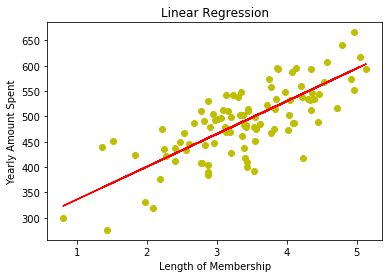

In [88]:
plot_fitted_line(b1,b0,xTest,yTest,"aaa")

### Plot example

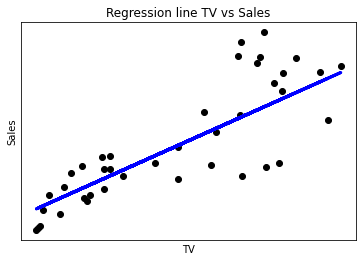

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [89]:
from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(xTrain[[list_c[3]]],yTrain)
b20=model.intercept_
b21=model.coef_



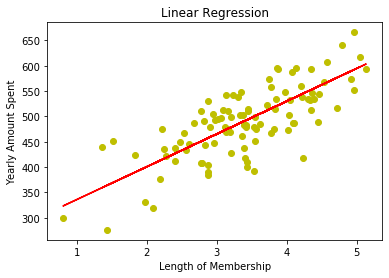

In [66]:
plot_fitted_line(b20,b21,xTest,yTest,"asf")

ModuleNotFoundError: No module named 'sklearn.matrics'

### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
x=d[d.columns.difference([list_c[4]])]
y=d[list_c[4]]
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,random_state=100)
model=LinearRegression().fit(xTest,yTest)
y_pred=model.predict(xTest)

print("MAE",mean_absolute_error(yTest,y_pred))
print("MSE",mean_squared_error(yTest,y_pred))
print("R-squared",r2_score(yTest,y_pred))
print("SMSE",np.sqrt(mean_squared_error(yTest,y_pred)))

MAE 36.97233186199036
MSE 2183.7878450434378
R-squared 0.5710732642336422
SMSE 46.731015878572954
